In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn import ensemble

In [2]:
%matplotlib inline

In [3]:
path = "accepts_xls_.xlsx"

In [4]:
excel = pd.read_excel(path, sheet_name=0)
excel_copy = excel.copy()
excel

,TITLE,CHILDREN,PERS_H,AGE,TMADD,TMJOB1,TEL,NMBLOAN,FINLOAN,INCOME,...,LOANS,REGN,CASH,PRODUCT,RESID,NAT,PROF,CAR,CARDS,GB
0,H,0,2,24,30,27,1,0,0,1900,...,0,0,2500,"Furniture,Carpet",Owner,German,Others,Car,no credit cards,0
1,H,0,2,37,3,72,2,0,0,0,...,0,0,700,"Dept. Store,Mail",Lease,German,Others,Car,Cheque card,0
2,H,0,2,23,6,30,1,0,1,2300,...,5,0,7000,"Furniture,Carpet",Lease,German,Others,Car,no credit cards,0
3,R,2,4,39,9,30,2,2,1,2200,...,2,0,4000,"Furniture,Carpet",Lease,German,"Civil Service, M",Car,no credit cards,1
4,R,3,5,28,0,168,1,0,0,1700,...,1,0,4000,"Furniture,Carpet",Lease,German,"Civil Service, M",Without Vehicle,no credit cards,1
5,H,0,2,22,3,84,2,0,1,2500,...,1,8,1100,Cars,Lease,German,Others,Car,no credit cards,1
6,R,0,2,31,36,144,2,0,1,2000,...,1,2,2000,"Furniture,Carpet",Lease,German,Others,Without Vehicle,no credit cards,1
7,R,0,2,28,36,33,2,0,0,3500,...,4,7,15000,"Furniture,Carpet",Owner,German,Others,Car,no credit cards,1
8,H,0,2,23,168,84,2,0,0,2400,...,1,7,1300,Leisure,Lease,German,Others,Car,no credit cards,0
9,R,0,2,23,9,9,2,0,0,1900,...,0,4,8000,Cars,Lease,Turkish,Others,Car,no credit cards,1


Statistics

In [5]:
excel.describe()

,CHILDREN,PERS_H,AGE,TMADD,TMJOB1,TEL,NMBLOAN,FINLOAN,INCOME,EC_CARD,INC,INC1,BUREAU,LOANS,REGN,CASH,GB
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.819667,2.358667,34.047667,119.282000,79.431000,1.81500,0.580667,0.477000,1996.800000,0.258333,31095.833333,2.385667,1.683333,1.008000,3.293667,2497.133333,0.500000
std,1.122007,1.416814,10.951501,180.089142,124.272858,0.38922,0.887932,0.499554,2318.521427,0.437791,45055.137196,1.211370,0.946584,1.112512,2.551914,6360.283237,0.500083
min,0.000000,1.000000,18.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,25.750000,21.000000,18.000000,2.00000,0.000000,0.000000,1000.000000,0.000000,2500.000000,2.000000,1.000000,0.000000,0.000000,900.000000,0.000000
50%,0.000000,2.000000,31.000000,60.000000,39.000000,2.00000,0.000000,0.000000,2100.000000,0.000000,2500.000000,2.000000,1.000000,1.000000,4.000000,1400.000000,0.500000
75%,1.000000,3.000000,40.000000,168.000000,96.000000,2.00000,2.000000,1.000000,2700.000000,1.000000,100000.000000,4.000000,3.000000,2.000000,5.000000,2500.000000,1.000000
max,23.000000,25.000000,71.000000,999.000000,999.000000,2.00000,2.000000,1.000000,100000.000000,1.000000,100000.000000,5.000000,3.000000,9.000000,9.000000,100000.000000,1.000000


In [6]:
loan_stat = excel['GB'].value_counts()
loan_stat

1    1500
0    1500
Name: GB, dtype: int64

In [7]:
def outliers_plot(column_name):
    print(excel.groupby(column_name).size())
    excel.hist(column=column_name, alpha=1)
    plt.plot()
    plt.xlim(0, excel[column_name].max())

CHILDREN
0     1585
1      676
2      532
3      149
4       41
5       13
6        2
8        1
23       1
dtype: int64


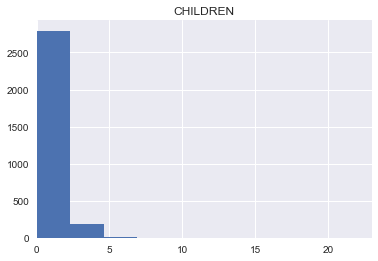

In [8]:
outliers_plot('CHILDREN')

TMADD
0       39
3      168
6      123
9      128
12      91
15      88
18      85
21      79
24      72
30     139
36     139
42     111
48     104
54     107
60      78
66      71
72      66
84     112
96     110
108     79
120    113
144    144
168    149
192    116
216     61
240     91
264     93
288     67
312     44
336     25
360     15
999     93
dtype: int64


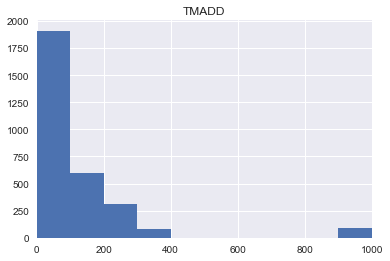

In [9]:
outliers_plot('TMADD')

TMJOB1
0        6
3       72
6      155
9      182
12     144
15     139
18     107
21     114
24     105
27     102
30     113
33      95
36     116
39      98
42      65
45      77
48      94
54     115
60      94
66      76
72      67
84     101
96      85
108     75
120     77
144     85
168     86
192     82
216     52
240     49
288     95
336     43
999     34
dtype: int64


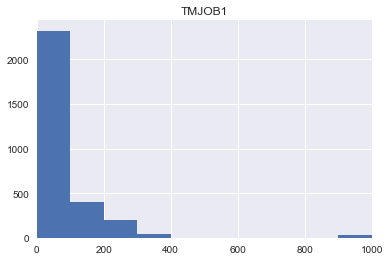

In [10]:
outliers_plot('TMJOB1')

Checking groups

In [11]:
categories = ['PRODUCT', 'RESID', 'NAT', 'PROF', 'CAR', 'CARDS', 'TITLE']

df = None
for i in categories:
    current_df = excel[i].isnull().value_counts().to_frame()
    df = pd.concat([df, current_df], axis=1)
df
df.style.format("{:.0f}")

,PRODUCT,RESID,NAT,PROF,CAR,CARDS,TITLE
False,2988,2465,3000,2999,3000,3000,3000
True,12,535,nan,1,nan,nan,nan


In [12]:
drop_list = []
for i, row in excel.iterrows():
    if excel['CHILDREN'][i] > 10:
        drop_list.append(i)
    if (excel['TMADD'][i] / 12) > excel['AGE'][i]:
        drop_list.append(i)
    if (excel['TMJOB1'][i] / 12 - 11) > (excel['AGE'][i] - 18):
        drop_list.append(i)
    if excel['AGE'][i] > 75:
        drop_list.append(i)

In [13]:
drop_list = np.unique(np.array(drop_list))
print(type(drop_list))
drop_list

<class 'numpy.ndarray'>


array([  31,   33,   35,   43,   55,   57,   59,   70,   82,  158,  199,
        201,  214,  217,  219,  257,  258,  259,  278,  291,  295,  296,
        301,  315,  331,  332,  349,  359,  360,  362,  369,  374,  382,
        384,  390,  405,  411,  423,  433,  436,  438,  458,  460,  462,
        463,  488,  505,  512,  519,  541,  554,  555,  565,  567,  573,
        578,  579,  583,  587,  613,  617,  624,  668,  684,  694,  696,
        716,  717,  733,  795,  803,  806,  810,  820,  846,  879,  912,
        915,  919,  924,  944,  953,  956,  989,  990,  991, 1012, 1014,
       1023, 1036, 1042, 1071, 1080, 1088, 1093, 1102, 1104, 1109, 1115,
       1144, 1154, 1160, 1175, 1210, 1238, 1241, 1291, 1311, 1322, 1324,
       1327, 1339, 1351, 1355, 1357, 1384, 1392, 1437, 1445, 1462, 1472,
       1476, 1478, 1485, 1486, 1495, 1500, 1507, 1511, 1526, 1564, 1570,
       1587, 1623, 1629, 1635, 1649, 1653, 1668, 1677, 1681, 1690, 1697,
       1699, 1712, 1734, 1797, 1829, 1840, 1865, 18

In [14]:
excel.drop(excel.index[drop_list], inplace=True)
excel

,TITLE,CHILDREN,PERS_H,AGE,TMADD,TMJOB1,TEL,NMBLOAN,FINLOAN,INCOME,...,LOANS,REGN,CASH,PRODUCT,RESID,NAT,PROF,CAR,CARDS,GB
0,H,0,2,24,30,27,1,0,0,1900,...,0,0,2500,"Furniture,Carpet",Owner,German,Others,Car,no credit cards,0
1,H,0,2,37,3,72,2,0,0,0,...,0,0,700,"Dept. Store,Mail",Lease,German,Others,Car,Cheque card,0
2,H,0,2,23,6,30,1,0,1,2300,...,5,0,7000,"Furniture,Carpet",Lease,German,Others,Car,no credit cards,0
3,R,2,4,39,9,30,2,2,1,2200,...,2,0,4000,"Furniture,Carpet",Lease,German,"Civil Service, M",Car,no credit cards,1
4,R,3,5,28,0,168,1,0,0,1700,...,1,0,4000,"Furniture,Carpet",Lease,German,"Civil Service, M",Without Vehicle,no credit cards,1
5,H,0,2,22,3,84,2,0,1,2500,...,1,8,1100,Cars,Lease,German,Others,Car,no credit cards,1
6,R,0,2,31,36,144,2,0,1,2000,...,1,2,2000,"Furniture,Carpet",Lease,German,Others,Without Vehicle,no credit cards,1
7,R,0,2,28,36,33,2,0,0,3500,...,4,7,15000,"Furniture,Carpet",Owner,German,Others,Car,no credit cards,1
8,H,0,2,23,168,84,2,0,0,2400,...,1,7,1300,Leisure,Lease,German,Others,Car,no credit cards,0
9,R,0,2,23,9,9,2,0,0,1900,...,0,4,8000,Cars,Lease,Turkish,Others,Car,no credit cards,1


In [15]:
excel.fillna({'RESID': 'Other', 'PRODUCT': 'Others', 'PROF': 'Others'}, inplace=True)

,TITLE,CHILDREN,PERS_H,AGE,TMADD,TMJOB1,TEL,NMBLOAN,FINLOAN,INCOME,...,LOANS,REGN,CASH,PRODUCT,RESID,NAT,PROF,CAR,CARDS,GB
0,H,0,2,24,30,27,1,0,0,1900,...,0,0,2500,"Furniture,Carpet",Owner,German,Others,Car,no credit cards,0
1,H,0,2,37,3,72,2,0,0,0,...,0,0,700,"Dept. Store,Mail",Lease,German,Others,Car,Cheque card,0
2,H,0,2,23,6,30,1,0,1,2300,...,5,0,7000,"Furniture,Carpet",Lease,German,Others,Car,no credit cards,0
3,R,2,4,39,9,30,2,2,1,2200,...,2,0,4000,"Furniture,Carpet",Lease,German,"Civil Service, M",Car,no credit cards,1
4,R,3,5,28,0,168,1,0,0,1700,...,1,0,4000,"Furniture,Carpet",Lease,German,"Civil Service, M",Without Vehicle,no credit cards,1
5,H,0,2,22,3,84,2,0,1,2500,...,1,8,1100,Cars,Lease,German,Others,Car,no credit cards,1
6,R,0,2,31,36,144,2,0,1,2000,...,1,2,2000,"Furniture,Carpet",Lease,German,Others,Without Vehicle,no credit cards,1
7,R,0,2,28,36,33,2,0,0,3500,...,4,7,15000,"Furniture,Carpet",Owner,German,Others,Car,no credit cards,1
8,H,0,2,23,168,84,2,0,0,2400,...,1,7,1300,Leisure,Lease,German,Others,Car,no credit cards,0
9,R,0,2,23,9,9,2,0,0,1900,...,0,4,8000,Cars,Lease,Turkish,Others,Car,no credit cards,1


In [16]:
for i in categories:
    print(excel[i].value_counts().to_frame(), '\n')

                  PRODUCT
Radio, TV, Hifi      1335
Furniture,Carpet      827
Dept. Store,Mail      375
Cars                  187
Leisure                60
Others                 13 

       RESID
Lease   2200
Other    490
Owner    107 

                   NAT
German            2298
Turkish            307
Others              78
Greek               43
Other European      23
Yugoslav            23
Italian             18
Spanish/Portugue     7 

                  PROF
Others            2034
Civil Service, M   237
Food,Building,Ca   226
Pensioner          111
Self-employed pe    66
Military Service    39
State,Steel Ind,    36
Sea Vojage, Gast    24
Chemical Industr    24 

                   CAR
Car               2144
Without Vehicle    638
Car and Motor bi    15 

                  CARDS
no credit cards    2002
Cheque card         716
Mastercard/Euroc     62
Other credit car      9
VISA Others           3
VISA mybank           3
American Express      2 

   TITLE
H   2046
R    751 



In [17]:
excel.drop_duplicates(inplace=True)

We can't use text data in multiple regression. We should give indexes to each group in such columns.

In [18]:
prod_groups = excel['PRODUCT'].unique()
prod_index = pd.DataFrame(prod_groups, index=np.arange(len(prod_groups)), columns=['product'])
prod_index

,product
0,"Furniture,Carpet"
1,"Dept. Store,Mail"
2,Cars
3,Leisure
4,"Radio, TV, Hifi"
5,Others


In [19]:
resid_groups = excel['RESID'].unique()
resid_index = pd.DataFrame(resid_groups, index=np.arange(len(resid_groups)), columns=['resid'])
resid_index

,resid
0,Owner
1,Lease
2,Other


In [20]:
nat_groups = excel['NAT'].unique()
nat_index = pd.DataFrame(nat_groups, index=np.arange(len(nat_groups)), columns=['nat'])
nat_index

,nat
0,German
1,Turkish
2,Other European
3,Others
4,Greek
5,Yugoslav
6,Italian
7,Spanish/Portugue


In [21]:
car_groups = excel['CAR'].unique()
car_index = pd.DataFrame(car_groups, index=np.arange(len(car_groups)), columns=['car'])
car_index

,car
0,Car
1,Without Vehicle
2,Car and Motor bi


In [22]:
card_groups = excel['CARDS'].unique()
card_index = pd.DataFrame(card_groups, index=np.arange(len(card_groups)), columns=['cards'])
card_index

,cards
0,no credit cards
1,Cheque card
2,Mastercard/Euroc
3,VISA mybank
4,Other credit car
5,VISA Others
6,American Express


In [23]:
prof_groups = excel['PROF'].unique()
prof_index = pd.DataFrame(prof_groups, index=np.arange(len(prof_groups)), columns=['prof'])
prof_index

,prof
0,Others
1,"Civil Service, M"
2,"Food,Building,Ca"
3,Pensioner
4,Self-employed pe
5,Chemical Industr
6,"Sea Vojage, Gast"
7,Military Service
8,"State,Steel Ind,"


In [24]:
title_groups = excel['TITLE'].unique()
title_index = pd.DataFrame(title_groups, index=np.arange(len(title_groups)), columns=['title'])
title_index

,title
0,H
1,R


In [25]:
def excel_replace(subject_index, col, subject_name):
    for i in subject_index.index:
        col.replace(subject_index.iloc[i][subject_name], i, inplace=True)

In [26]:
replace_args = np.array([
    [prof_index, excel.PROF, 'prof'],
    [car_index, excel.CAR, 'car'],
    [card_index, excel.CARDS, 'cards'],
    [nat_index, excel.NAT, 'nat'],
    [prod_index, excel.PRODUCT, 'product'],
    [resid_index, excel.RESID, 'resid'],
    [title_index, excel.TITLE, 'title']
])

for i, item in enumerate(replace_args):
    excel_replace(
        replace_args.item(i, 0),
        replace_args.item(i, 1),
        replace_args.item(i, 2)
    )


In [27]:
# Now we have just numeric data

excel

,TITLE,CHILDREN,PERS_H,AGE,TMADD,TMJOB1,TEL,NMBLOAN,FINLOAN,INCOME,...,LOANS,REGN,CASH,PRODUCT,RESID,NAT,PROF,CAR,CARDS,GB
0,0,0,2,24,30,27,1,0,0,1900,...,0,0,2500,0,0,0,0,0,0,0
1,0,0,2,37,3,72,2,0,0,0,...,0,0,700,1,1,0,0,0,1,0
2,0,0,2,23,6,30,1,0,1,2300,...,5,0,7000,0,1,0,0,0,0,0
3,1,2,4,39,9,30,2,2,1,2200,...,2,0,4000,0,1,0,1,0,0,1
4,1,3,5,28,0,168,1,0,0,1700,...,1,0,4000,0,1,0,1,1,0,1
5,0,0,2,22,3,84,2,0,1,2500,...,1,8,1100,2,1,0,0,0,0,1
6,1,0,2,31,36,144,2,0,1,2000,...,1,2,2000,0,1,0,0,1,0,1
7,1,0,2,28,36,33,2,0,0,3500,...,4,7,15000,0,0,0,0,0,0,1
8,0,0,2,23,168,84,2,0,0,2400,...,1,7,1300,3,1,0,0,0,0,0
9,1,0,2,23,9,9,2,0,0,1900,...,0,4,8000,2,1,1,0,0,0,1


In [28]:
excel_num = excel.copy()

In [29]:
corr_table = excel.corr()
corr_table

,TITLE,CHILDREN,PERS_H,AGE,TMADD,TMJOB1,TEL,NMBLOAN,FINLOAN,INCOME,...,LOANS,REGN,CASH,PRODUCT,RESID,NAT,PROF,CAR,CARDS,GB
TITLE,1.000000,-0.042458,-0.063998,0.141609,0.033067,-0.022011,-0.035000,-0.125539,-0.195462,-0.153624,...,-0.105178,-0.120167,-0.027139,-0.130253,-0.021640,-0.060095,0.005596,0.199751,0.081752,-0.019324
CHILDREN,-0.042458,1.000000,0.946300,0.126682,-0.037027,0.184062,0.010940,0.048590,0.077260,0.104667,...,0.138413,-0.049550,0.016055,-0.051927,-0.035406,0.089294,-0.072055,-0.088927,-0.013915,-0.084016
PERS_H,-0.063998,0.946300,1.000000,0.205267,-0.030797,0.221063,0.034333,0.064382,0.093695,0.118187,...,0.162399,-0.045111,0.018964,-0.063579,-0.057427,0.111955,-0.067088,-0.111936,-0.009370,-0.146108
AGE,0.141609,0.126682,0.205267,1.000000,0.236400,0.376677,0.015805,0.013803,0.032465,0.031691,...,0.050624,-0.123258,0.043162,-0.107667,-0.079821,0.002286,0.118260,0.084063,0.064281,-0.274033
TMADD,0.033067,-0.037027,-0.030797,0.236400,1.000000,0.215075,-0.001700,-0.039237,-0.050894,-0.001142,...,-0.060565,-0.132749,-0.002259,-0.024294,0.017672,-0.030452,0.052611,0.024270,0.048817,-0.050263
TMJOB1,-0.022011,0.184062,0.221063,0.376677,0.215075,1.000000,0.049432,0.111224,0.140279,0.117372,...,0.119568,-0.015350,0.012076,-0.014702,-0.007145,0.045969,0.043915,-0.048322,-0.001883,-0.207581
TEL,-0.035000,0.010940,0.034333,0.015805,-0.001700,0.049432,1.000000,0.082893,0.156984,0.100876,...,0.076414,0.278853,0.004523,0.110089,-0.002079,0.066546,0.022131,-0.067060,-0.041804,-0.124666
NMBLOAN,-0.125539,0.048590,0.064382,0.013803,-0.039237,0.111224,0.082893,1.000000,0.410583,0.058551,...,0.251272,0.062579,-0.015113,0.104144,0.026136,0.103718,0.009810,-0.022740,-0.037441,-0.077615
FINLOAN,-0.195462,0.077260,0.093695,0.032465,-0.050894,0.140279,0.156984,0.410583,1.000000,0.122879,...,0.265396,0.185270,-0.012852,0.086220,0.036187,0.066706,0.037499,-0.081277,-0.019463,-0.066769
INCOME,-0.153624,0.104667,0.118187,0.031691,-0.001142,0.117372,0.100876,0.058551,0.122879,1.000000,...,0.120901,0.182888,0.080114,0.067434,-0.005697,0.058915,0.037770,-0.042825,-0.316545,0.051119


As we can see, this table is too huge. A diverging palette is more convenient way
to find and exclude some columns according to correlation results.

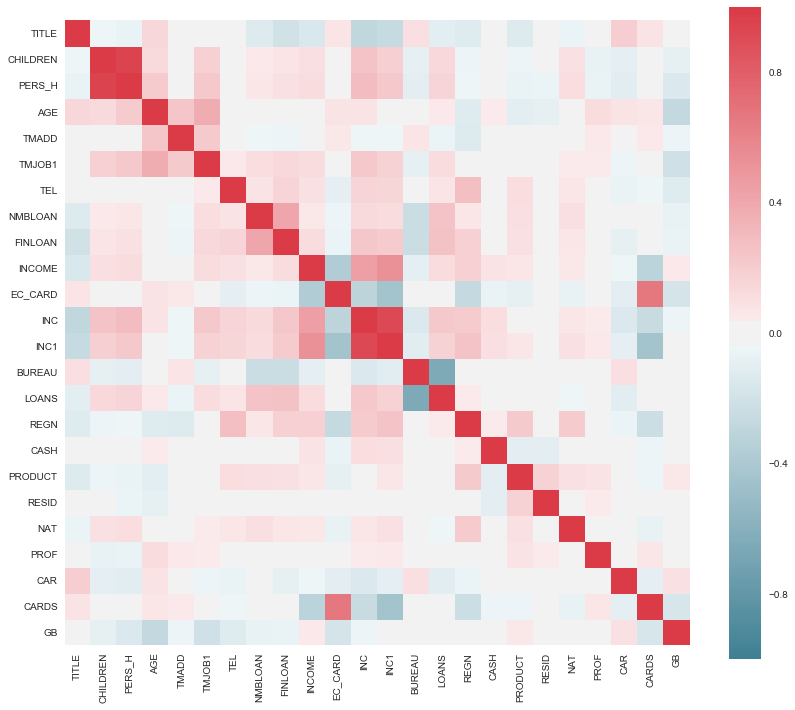

In [30]:
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(
    corr_table,
    mask=np.zeros_like(corr_table, dtype=np.bool),
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True,
    ax=ax
)

In [31]:
excel.drop(['RESID', 'PROF'], axis=1, inplace=True)

In [32]:
X = excel.drop(('GB'), axis=1)
y = excel['GB']
feature_names = X.columns
print(feature_names)

Index(['TITLE', 'CHILDREN', 'PERS_H', 'AGE', 'TMADD', 'TMJOB1', 'TEL',
       'NMBLOAN', 'FINLOAN', 'INCOME', 'EC_CARD', 'INC', 'INC1', 'BUREAU',
       'LOANS', 'REGN', 'CASH', 'PRODUCT', 'NAT', 'CAR', 'CARDS'],
      dtype='object')


In [33]:
# Creating training and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

N_train = X_train.shape[0]
N_test = X_test.shape[0]
print(N_train, N_test)

1957 840


In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)

err_test = np.mean(y_test != y_test_predict)
print(err_test)

0.44880952381


In [35]:
rf = ensemble.RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=11)
rf.fit(X_train, y_train)

err_test = np.mean(y_test != rf.predict(X_test))
print(err_test)

0.339285714286


In [36]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_test = np.mean(y_test != gbt.predict(X_test))
print(err_test)

0.357142857143


In [37]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature {:8s} ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature AGE      (0.1482)
 2. feature TMJOB1   (0.1189)
 3. feature TMADD    (0.1029)
 4. feature CASH     (0.0991)
 5. feature INCOME   (0.0731)
 6. feature REGN     (0.0642)
 7. feature LOANS    (0.0517)
 8. feature PERS_H   (0.0511)
 9. feature PRODUCT  (0.0412)
10. feature CHILDREN (0.0316)
11. feature NMBLOAN  (0.0277)
12. feature NAT      (0.0239)
13. feature FINLOAN  (0.0219)
14. feature TEL      (0.0212)
15. feature CARDS    (0.0206)
16. feature CAR      (0.0205)
17. feature INC1     (0.0196)
18. feature BUREAU   (0.0183)
19. feature TITLE    (0.0172)
20. feature INC      (0.0142)
21. feature EC_CARD  (0.0130)


(-1, 14)

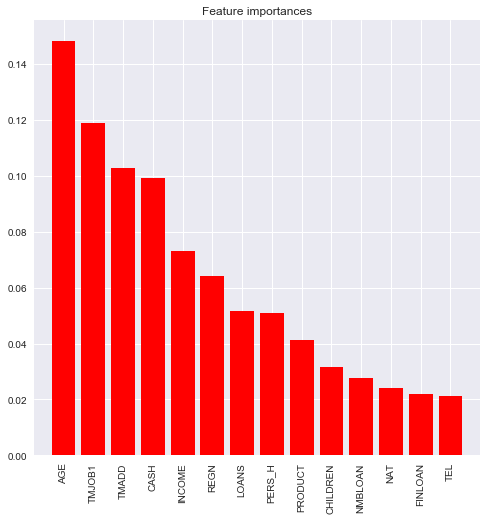

In [38]:
d_first = 14
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center', color='r')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first])

In [39]:
print("AUC-ROC (test) = ", roc_auc_score(y_test, rf.predict(X_test)))
print("AUC-ROC (test) = ", roc_auc_score(y_test, knn.predict(X_test)))
print("AUC-ROC (test) = ", roc_auc_score(y_test, gbt.predict(X_test)))

AUC-ROC (test) =  0.662149700292
AUC-ROC (test) =  0.554630530936
AUC-ROC (test) =  0.644295302013
